In [ ]:
#!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    #plt.show()  

print(cv2.__version__)

4.1.2


# 1. 영상의 이해

[[  0 128   0]
 [255 255 200]
 [  0 128 280]] int64


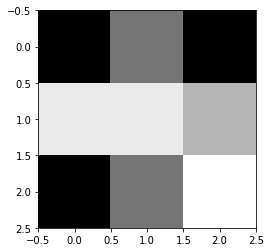

In [ ]:


a = np.array([[0, 128, 0],
              [255,255,200],
              [0,128, 280]
              ])

print(a, a.dtype)

plt.imshow(a, cmap='gray')



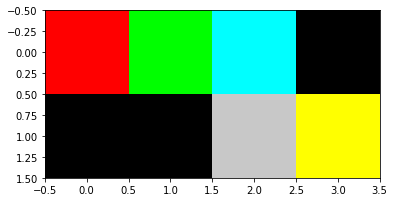

In [ ]:
a = np.zeros((2,4,3))

a[0,0,0] = 255
a[0,0,1] = 0
a[0,0,2] = 0

a[0,1,0] = 0
a[0,1,1] = 255
a[0,1,2] = 0

a[1,3,0] = 255
a[1,3,1] = 255
a[1,3,2] = 0

a[1,2,0] = 200
a[1,2,1] = 200
a[1,2,2] = 200


a[0,2] = [0,255,255]
a[0,2, :] = [0,255,255]

plt.imshow(a/255.0)   

In [ ]:
cv2.imwrite('temp.jpg', a)

True

(488, 750, 3)


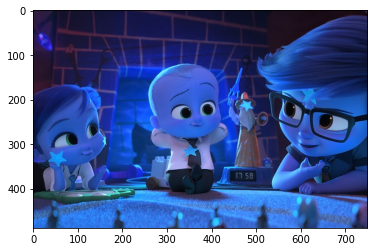

In [ ]:
img = cv2.imread('test.jpg')   #RGB가인 BGR 순서
print(img.shape)

plt.imshow(img)

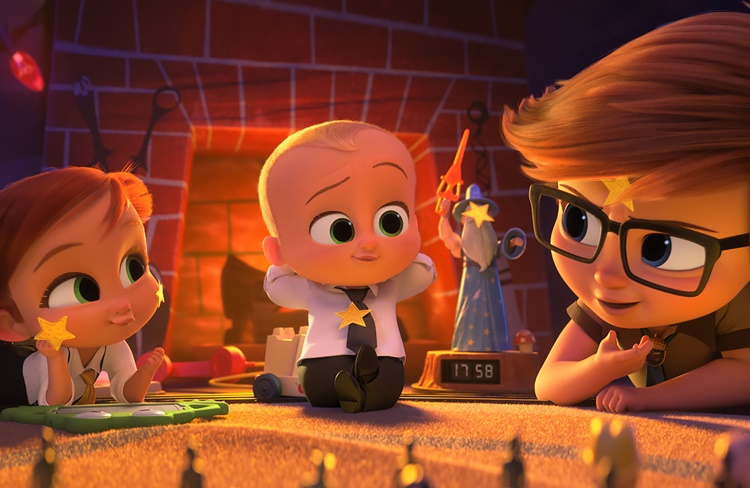

In [ ]:
cv2_imshow(img)

In [ ]:
cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

# RGB 채널 교환

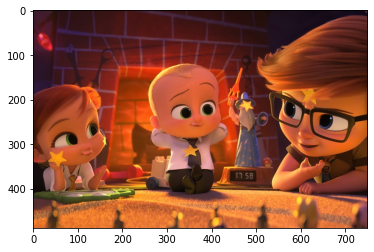

In [ ]:
# R채널과 B채널 교환
img2 = img.copy()
img2[:,:, 0] = img[:,:,2]   #  BGR
img2[:,:, 2] = img[:,:,0]

plt.imshow(img2)

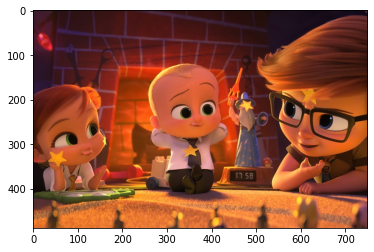

In [ ]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

In [ ]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()   

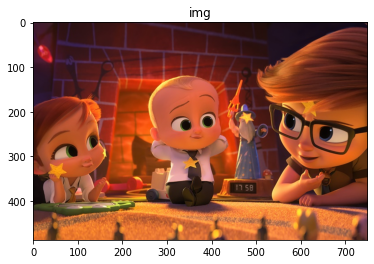

In [ ]:
imshow("img", img)

(488, 750)


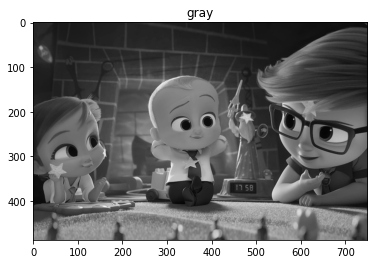

In [ ]:
gray = cv2.imread('test.jpg',0)
print(gray.shape)
imshow("gray", gray)

# 크로마키 영상 처리

(332, 590, 3)


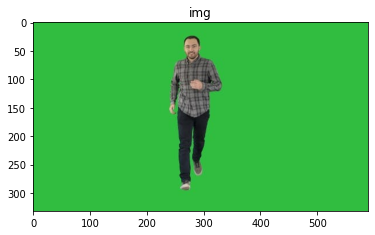

In [ ]:
img = cv2.imread('chromakey.jpg')
print(img.shape)
imshow("img", img)

In [ ]:
img[0,0], img[0,1], img[20, 20]

(array([ 64, 189,  49], dtype=uint8),
 array([ 64, 189,  49], dtype=uint8),
 array([ 64, 189,  49], dtype=uint8))

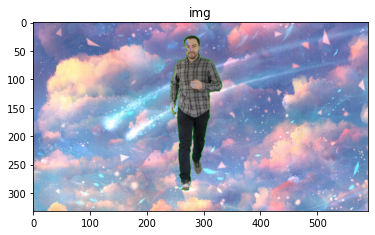

In [ ]:
img = cv2.imread('chromakey.jpg')
background = cv2.imread('background.jpg')

height, width, _ = img.shape

for h in range(height) :
  for w in range(width) :
    b, g, r = img[h,w]
    #if g == 189 : 
    #if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
    if ( g > 165 and g < 200 ) :
      img[h,w] = background[h,w]
    #img[h, w] = img[h,w]
imshow("img", img)    

(332, 590, 3) (332, 590, 3)


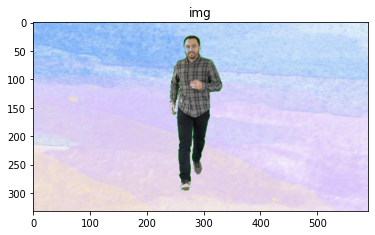

In [ ]:
img = cv2.imread('chromakey.jpg')
height, width, _ = img.shape

#background = cv2.imread('background.jpg')
background = cv2.imread('small.png')
background = cv2.resize(background, (width, height )  )

print(img.shape, background.shape)
for h in range(height) :
  for w in range(width) :
    b, g, r = img[h,w]
    #if g == 189 : 
    #if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
    if ( g > 165 and g < 200 ) :
      img[h,w] = background[h,w]
    #img[h, w] = img[h,w]
imshow("img", img)    

# 동영상 읽기

In [ ]:
cap = cv2.VideoCapture(0)


In [ ]:
cap.release()

In [ ]:
cap = cv2.VideoCapture('stopwatch.avi')

In [ ]:
cap.isOpened()

True

In [ ]:
for i in range(5) :
  ret, frame = cap.read()
  imshow("video", frame)

# 흑백영상으로 변화

(480, 640)


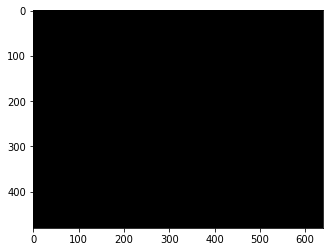

In [ ]:
ret, frame = cap.read()
frame.shape
img = np.zeros((height, width), dtype=np.uint8)
print(img.shape)
imshow("", img)

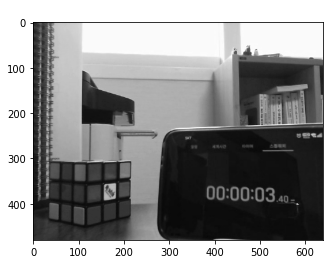

In [ ]:
height, width, _ = frame.shape
for h in range(height) :
  for w in range(width) :
    b, g, r = frame[h,w] #
    img[h, w] = (int(b)  + int(g)  + int(r) ) / 3
imshow(" ", img)    

In [ ]:
cap = cv2.VideoCapture('stopwatch.avi')

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
    
fourcc = cv2.VideoWriter_fourcc(*'DIVX') # *'DIVX' == 'D', 'I', 'V', 'X'
    
outputVideo = cv2.VideoWriter('output.avi', fourcc, fps/2, (w, h))
    
while True:
        ret, frame = cap.read()
        if not ret:  break
        # video processing
        frame[:,:,1] = frame[:,:,0]
        frame[:,:,2] = frame[:,:,0]

        outputVideo.write(frame)   
    
outputVideo.release()
cap.release()

In [ ]:
!ffmpeg -i output.avi output.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# drawing

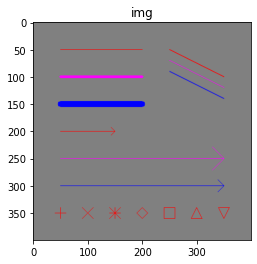

In [ ]:
img = np.full((400, 400, 3), 128, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255))
cv2.line(img, (50, 100), (200, 100), (255, 0, 255), 3)
cv2.line(img, (50, 150), (200, 150), (255, 0, 0), 10)

cv2.line(img, (250, 50), (350, 100), (0, 0, 255), 1, cv2.LINE_4)
cv2.line(img, (250, 70), (350, 120), (255, 0, 255), 1, cv2.LINE_8)
cv2.line(img, (250, 90), (350, 140), (255, 0, 0), 1, cv2.LINE_AA)

cv2.arrowedLine(img, (50, 200), (150, 200), (0, 0, 255), 1)
cv2.arrowedLine(img, (50, 250), (350, 250), (255, 0, 255), 1)
cv2.arrowedLine(img, (50, 300), (350, 300), (255, 0, 0), 1, cv2.LINE_8, 0, 0.05)

cv2.drawMarker(img, (50, 350), (0, 0, 255), cv2.MARKER_CROSS)
cv2.drawMarker(img, (100, 350), (0, 0, 255), cv2.MARKER_TILTED_CROSS)
cv2.drawMarker(img, (150, 350), (0, 0, 255), cv2.MARKER_STAR)
cv2.drawMarker(img, (200, 350), (0, 0, 255), cv2.MARKER_DIAMOND)
cv2.drawMarker(img, (250, 350), (0, 0, 255), cv2.MARKER_SQUARE)
cv2.drawMarker(img, (300, 350), (0, 0, 255), cv2.MARKER_TRIANGLE_UP)
cv2.drawMarker(img, (350, 350), (0, 0, 255), cv2.MARKER_TRIANGLE_DOWN)

imshow("img", img)

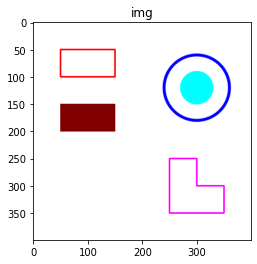

In [ ]:
img = np.full((400, 400, 3), 255, np.uint8)

cv2.rectangle(img, (50, 50), (150, 100), (0, 0, 255), 2)
cv2.rectangle(img, (50, 150), (150, 200), (0, 0, 128), -1)

cv2.circle(img, (300, 120), 30, (255, 255, 0), -1, cv2.LINE_AA)
cv2.circle(img, (300, 120), 60, (255, 0, 0), 3, cv2.LINE_AA)
    
    
pts = np.array([[250, 250], [300, 250], [300, 300], [350, 300], [350, 350], [250, 350]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2)

imshow("img", img)

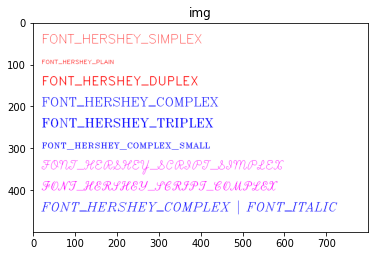

In [ ]:
img = np.full((500, 800, 3), 255, np.uint8)

cv2.putText(img, "FONT_HERSHEY_SIMPLEX", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
cv2.putText(img, "FONT_HERSHEY_PLAIN", (20, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
cv2.putText(img, "FONT_HERSHEY_DUPLEX", (20, 150), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
cv2.putText(img, "FONT_HERSHEY_COMPLEX", (20, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))
cv2.putText(img, "FONT_HERSHEY_TRIPLEX", (20, 250), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0))
cv2.putText(img, "FONT_HERSHEY_COMPLEX_SMALL", (20, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0))
cv2.putText(img, "FONT_HERSHEY_SCRIPT_SIMPLEX", (20, 350), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255, 0, 255))
cv2.putText(img, "FONT_HERSHEY_SCRIPT_COMPLEX", (20, 400), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (255, 0, 255))
cv2.putText(img, "FONT_HERSHEY_COMPLEX | FONT_ITALIC", (20, 450), cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (255, 0, 0))

imshow("img", img)

# 키보드, 마우스 이벤트

In [ ]:
cap = cv2.VideoCapture('stopwatch.avi')

if not cap.isOpened():
    print("Video open failed!")
else :
    while True:
        
        ret, frame = cap.read()

        if not ret:  break

        cv2.imshow('frame', frame)
        
        keycode = cv2.waitKey()
        if keycode == 27 or keycode == ord('q'):  break   # ESC
cap.release()
cv2.destroyAllWindows()

In [ ]:
def on_mouse(event, x, y, flags, param):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        print('EVENT_LBUTTONUP: %d, %d' % (x, y))

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 255, 255), 10)
            cv2.imshow('img', img)
            oldx, oldy = x, y


img = cv2.imread('sunset.jpg')

cv2.namedWindow('img')
cv2.setMouseCallback('img', on_mouse)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

#영상처리 : 밝기 조절

(512, 512)


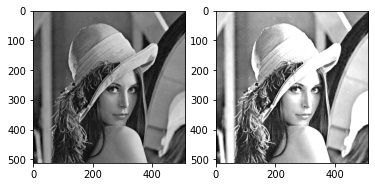

In [ ]:
src = cv2.imread('lenna.bmp', 0)
print(src.shape)

#dst = src + 120             # 210 + 120   330

dst = cv2.add(src, 100)   #   255보다 255조절, 0작으면 0조절

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

# 명암대비증가를 통한 밝기 개선

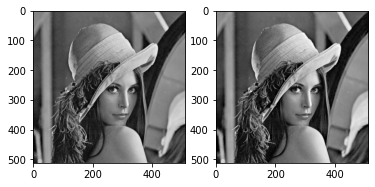

In [ ]:
src = cv2.imread('lenna.bmp', 0)
alpha = 0.3
# dst(x,y) = src(x,y) + (src(x,y) - 128)*alpha    
           
dst = np.clip(src + (src-128.0) * alpha, 0, 255).astype(np.uint8)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)  

In [ ]:
a = np.array([1,3,30], dtype=np.uint8)

print(a)
print(a - 10)  #  1 - 10  =>  -9   => 11010101011111 247
print(a - 10.0)       float(a) - 10.0  ->   0 0 20


[ 1  3 30]
[247 249  20]
[-9. -7. 20.]


# 감마보정

In [ ]:
src = cv2.imread("gamma.JPG") 
gamma = 0.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
dst = cv2.LUT(src, lut)


gamma = 1.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
       
dst2 = cv2.LUT(src, lut)

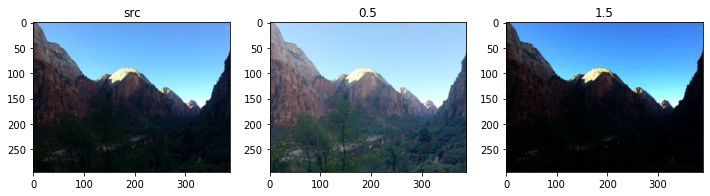

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("src", src)    
plt.subplot(1,3,2)
imshow("0.5", dst)    
plt.subplot(1,3,3)
imshow("1.5", dst2)   

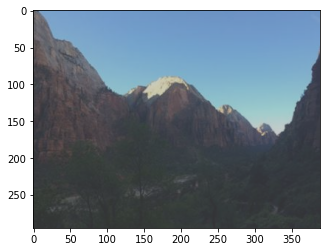

In [ ]:
# dst(x,y) = src(x,y) + (src(x,y) - 128)*alpha    

alpha = -0.4
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  
  t = i + (i-128) *alpha 
  if t < 0 : t = 0
  elif t > 255 : t = 255
  lut[i][0] =  t
#print(lut.T)

dst3 = cv2.LUT(src, lut)
imshow("", dst3) 

In [ ]:
# 밝기 어떻게 효과적으로 조절할꺼냐?

- +  : y = x + 5    , clipping 고려, 밝기는 개선되지마 대비도는 변화가 없음, y절편을 조절

- *  : y = alpha *  x, 최대값과 최소값의 범위를 벌려줌
       y = x + (x-128)* alpha ,   clipping 고려, 밝기개선, 
       어두은 더 어두워지고, 밝은 부분은 더 밝아짐(기준값 128), 기울기를 조절

- gamma correction :     (x/255)**gamma * 255, 지수형태를 사용해 대비를 크게 비선형으로 조절
                  
- lut를 통해서 고속으로 계산할 수 있음           



